# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Посмотрим начало, конец и описательные статистики и информацию о датасете.**

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Построили гистограмму для всех числовых столбцов таблицы на одном графике.**

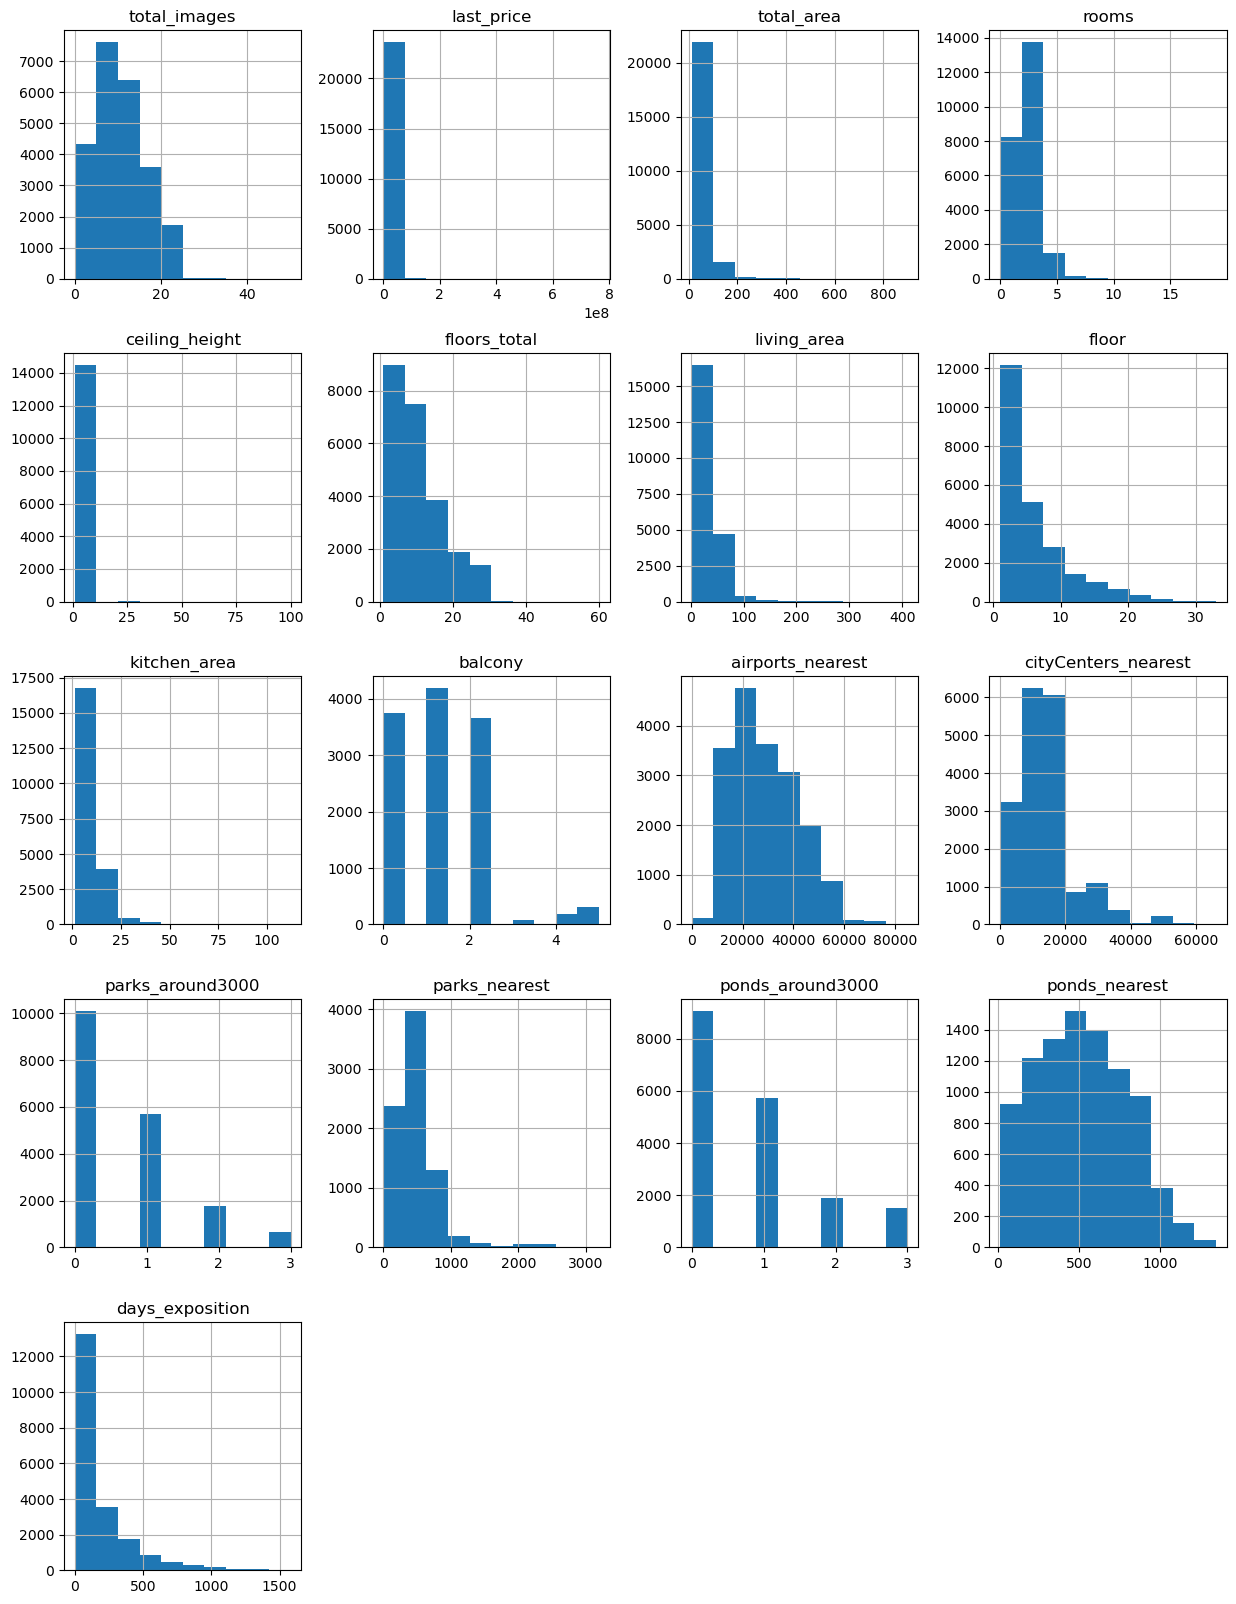

In [6]:
data.hist(figsize=(15, 20))
plt.show()

***Вывод:*** У таблицы 23699 строк и 22 столбца. Есть большое количество пропусков с которыми нужно будет поработать.

### Выполните предобработку данных

####  Найдити и изучить пропущенные значения в столбцах:

In [7]:
data.isnull().sum().sort_values() #пропуски в столбцах

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

***Пропуски выглядят некритично, люди могут не знать метры до объектов или им может быть лениво заполнять высоту потолков***

In [8]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [9]:
data.duplicated().sum() #дубликатов не замечено или они неявные

0

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False) #так как апартаменты булев массив, присвоим знацению NaN = False

In [11]:
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isna().sum() #удалили строчки в которых небыло населенного пункта. Они будут мешать в анализе
#и пользователям такие объявления не нужны

0

In [12]:
data['balcony'] = data['balcony'].fillna(0)

**Посмотрим столбец floors_total. Пропусков меньше 1%. Удаляем пропуски.**

In [13]:
data.dropna(subset=['floors_total'], inplace=True)
data.reset_index(drop=True, inplace=True)

**Займемся столбцом ceiling_height. Для нас данный столбец важно привести в порядок, тк по данному столбцу будет 
проводится исследование.**

In [14]:
data['ceiling_height'] = [i/10 if i>=20 else i for i in data['ceiling_height']]
data.drop(data[data['ceiling_height'] > 5].index, inplace=True)
data.drop(data[data['ceiling_height'] < 2].index, inplace=True)
data.reset_index(drop=True,inplace=True)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**Выше поменял логику, перед тем как удалить высоту ниже 2м и выше 5м- разделил значения выше 20 на 10. Теперь небольшие потери данных.Так же всем пропускам присвоил медиану.**

In [15]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data['kitchen_area'] = data['kitchen_area'].dropna()

In [16]:
data.loc[data['studio'] == True, 'living_area'] = 0
data['living_area'] = data['living_area'].dropna()

**Так как в студиях кухня и жилое пространство не разгроничены - проставим нули в кввартирах-студиях.**

In [17]:
data.isnull().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
living_area              1856
kitchen_area             2072
days_exposition          3169
parks_around3000         5498
ponds_around3000         5498
cityCenters_nearest      5499
airports_nearest         5522
ponds_nearest           14523
parks_nearest           15528
dtype: int64

#### Рассмотрим типы данных в каждом столбце:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23548 entries, 0 to 23547
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23548 non-null  int64  
 1   last_price            23548 non-null  float64
 2   total_area            23548 non-null  float64
 3   first_day_exposition  23548 non-null  object 
 4   rooms                 23548 non-null  int64  
 5   ceiling_height        23548 non-null  float64
 6   floors_total          23548 non-null  float64
 7   living_area           21692 non-null  float64
 8   floor                 23548 non-null  int64  
 9   is_apartment          23548 non-null  bool   
 10  studio                23548 non-null  bool   
 11  open_plan             23548 non-null  bool   
 12  kitchen_area          21476 non-null  float64
 13  balcony               23548 non-null  float64
 14  locality_name         23548 non-null  object 
 15  airports_nearest   

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

**Изменение типа данных колонки first_day_exposition на datetime64[ns] Так легче обрабатывать информацию**

**Тип данных в balcony и floors_total, вряд ли должен быть дробным.**

In [20]:
data['balcony'] = data['balcony'].astype(int)

In [21]:
data['floors_total'] = data['floors_total'].astype(int)

Присвоил столбцам balcony и floors_total, тип данных целые значения

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23548 entries, 0 to 23547
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23548 non-null  int64         
 1   last_price            23548 non-null  float64       
 2   total_area            23548 non-null  float64       
 3   first_day_exposition  23548 non-null  datetime64[ns]
 4   rooms                 23548 non-null  int64         
 5   ceiling_height        23548 non-null  float64       
 6   floors_total          23548 non-null  int32         
 7   living_area           21692 non-null  float64       
 8   floor                 23548 non-null  int64         
 9   is_apartment          23548 non-null  bool          
 10  studio                23548 non-null  bool          
 11  open_plan             23548 non-null  bool          
 12  kitchen_area          21476 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты:

In [23]:
len(data['locality_name'].unique())

364

In [24]:
data['locality_name'] = data['locality_name'].str.lower() # Много городков, посмотрим что будет, если изменить регистр букв

In [25]:
len(data['locality_name'].unique()) # Не помогло

364

In [26]:
data['locality_name'].unique() #Из перечисленного ниже видною 
#Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» 
#— это обозначения одних и тех же населённых пунктов. 
#Мы можем заменить названия в существующем столбце или создать новый с названиями без дубликатов.

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [27]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
) 

In [28]:
len(data['locality_name'].unique()) #Убрали 42 дубликата

322

**Вывод**
1. Я произвёл замену на медианное значение в пропущенных строках, где это посчитал уместным. Например высота этажей.
2. Если процент пропущенных значений от общего числа значений крайне мал, то такие строки я удалял из таблицы. 
Те значения, которые я не тронул, например расстояние до ближайшего парка или водоёма, число парков в радиусеу 3 км.,
число фотографий в объявлении - не понадобятся нам для дальнейших расчётов, их можно оставить без изменений.
3. Пропущенные значения, где указанно, сколько дней провисело объявление, я оставил без изменений, полагаю, что они означают, 
что объявление о продаже все еще не закрыто и квартира не продана.
4. Так же я изменил тип столбца first_day_exposition на datetime для дальнейшей работы с датой и временем.
5. Поменял тип столбца balcony и floors_total на int.

### Добавьте в таблицу новые столбцы

In [29]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['total_area'].round(decimals=2) #цена одного квадратного метра 
#(нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [30]:
data['day_of_week_exposition'] = data['first_day_exposition'].apply(lambda x: x.isoweekday()) #день недели публикации объявления 
#(0 — понедельник, 1 — вторник и так далее);

In [31]:
data['month_exposition'] = data['first_day_exposition'].dt.month_name() #месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year #год публикации объявления

In [32]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_status'] = data.apply(floor_status, axis=1) #тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [33]:
data['city_center_distance_km'] = (data['cityCenters_nearest'] / 1000).round() # расстояние до центра города в километрах 
# (переведите из м в км и 1000 # округлите до ближайших целых значений).

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,city_center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,108.0,4,March,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,40.4,2,December,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,56.0,4,August,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,159.0,5,July,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100.0,2,June,2018,другой,8.0


In [35]:
data['last_price'] = data['last_price']/ 1000 #стоимость квартиры в т.р.

### Проведите исследовательский анализ данных

#### Изучить перечисленные ниже параметры объектов и постройть отдельные гистограммы для каждого из этих параметров

In [36]:
data[['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height',
      'floor_status']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
count,23548.000000,21692.000000,21476.000000,23548.000000,23548.000000,23548.000000
mean,60.285640,34.307854,10.486467,6523.292929,2.070452,2.696055
std,35.519476,22.127016,5.932652,10832.328819,1.078010,0.215996
min,12.000000,0.000000,0.000000,12.190000,0.000000,2.000000
25%,40.000000,18.600000,7.000000,3400.000000,1.000000,2.600000
50%,52.000000,30.000000,9.000000,4638.000000,2.000000,2.650000
75%,69.700000,42.300000,12.000000,6790.000000,3.000000,2.700000
max,900.000000,409.700000,112.000000,763000.000000,19.000000,5.000000


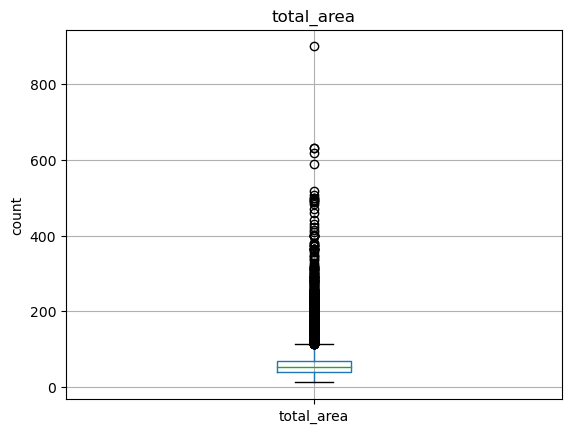

In [37]:
data.boxplot(column = 'total_area')
plt.title('total_area')
plt.ylabel('count')
plt.show()

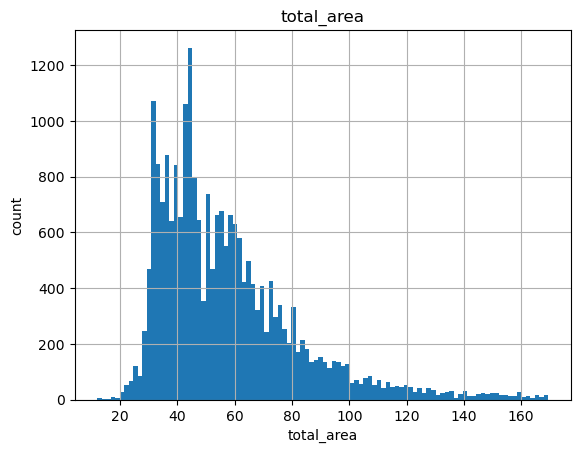

In [38]:
data.query('total_area < 170')['total_area'].hist(bins = 100)
plt.title('total_area')
plt.ylabel('count')
plt.xlabel('total_area')
plt.show()

**Вывод:**
После корректировки необходимых данных, мы получили удовлетворительные графики. Данные выглядят готовыми для исследования.

**По площади есть как квартира 12 кв.м., так и 900 кв.м. Но среднее значение выглядит более здравым. По данным видно, что в продаже в основном квартиры от 25 до 80 кв.м**

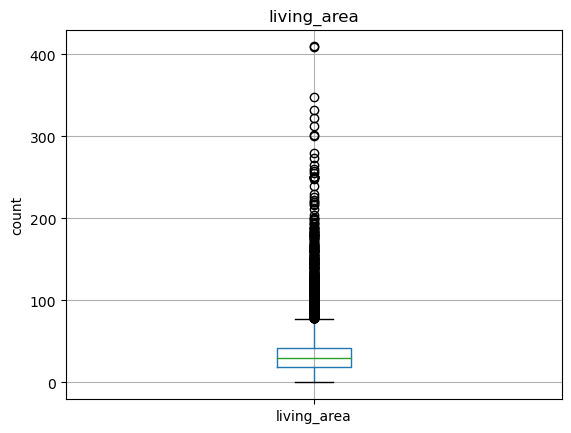

In [39]:
data.boxplot(column = 'living_area')
plt.title('living_area')
plt.ylabel('count')
plt.show()

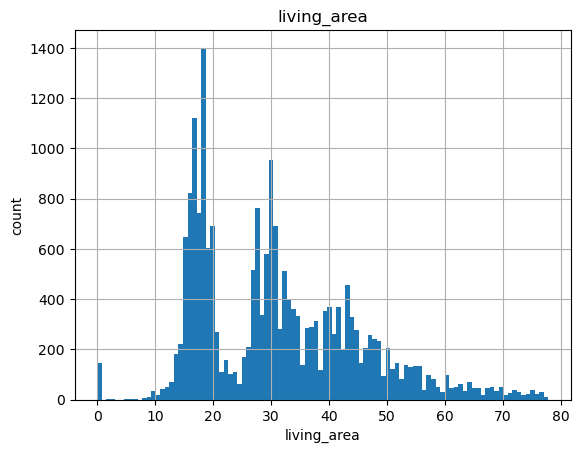

In [40]:
data.query('living_area < 78')['living_area'].hist(bins = 100)
plt.title('living_area')
plt.ylabel('count')
plt.xlabel('living_area')
plt.show()

**По жилой площади есть как квартира 0 кв.м. - т.к. является студией, так и 409.7 кв.м. Но среднее значение выглядит более здравым**

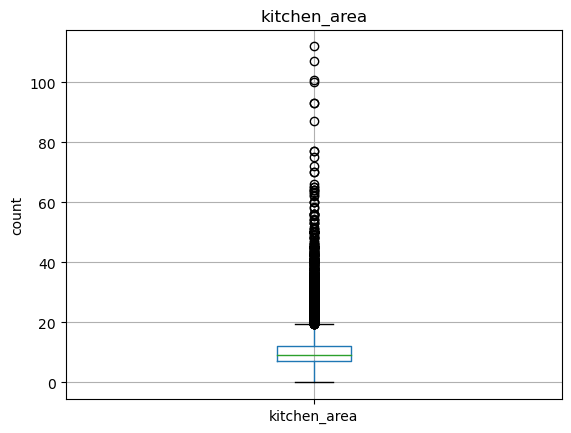

In [41]:
data.boxplot(column = 'kitchen_area')
plt.title('kitchen_area')
plt.ylabel('count')
plt.show()

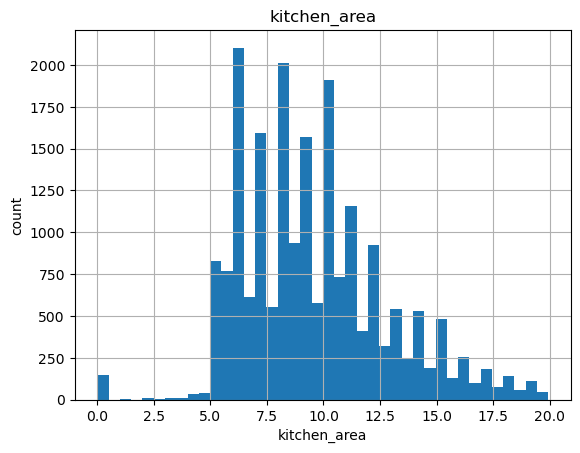

In [42]:
data.query('kitchen_area < 20')['kitchen_area'].hist(bins = 40)
plt.title('kitchen_area')
plt.ylabel('count')
plt.xlabel('kitchen_area')
plt.show()

**По площади кухни наблюдаем. Как малые значения 0 кв.м - т.к. является студией, так и очень большие 112 кв.м. Но среднее значение выглядит более здравым**

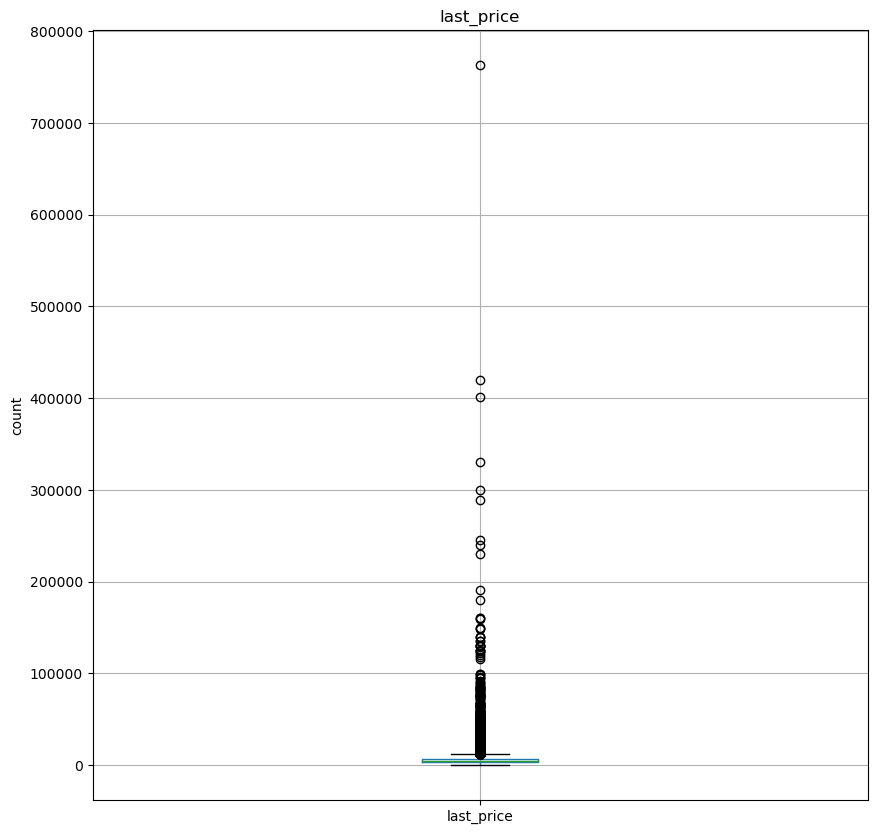

In [43]:
data.boxplot(column = 'last_price', figsize = (10,10)) # видны запредельные значения
plt.title('last_price')
plt.ylabel('count')
plt.show() 

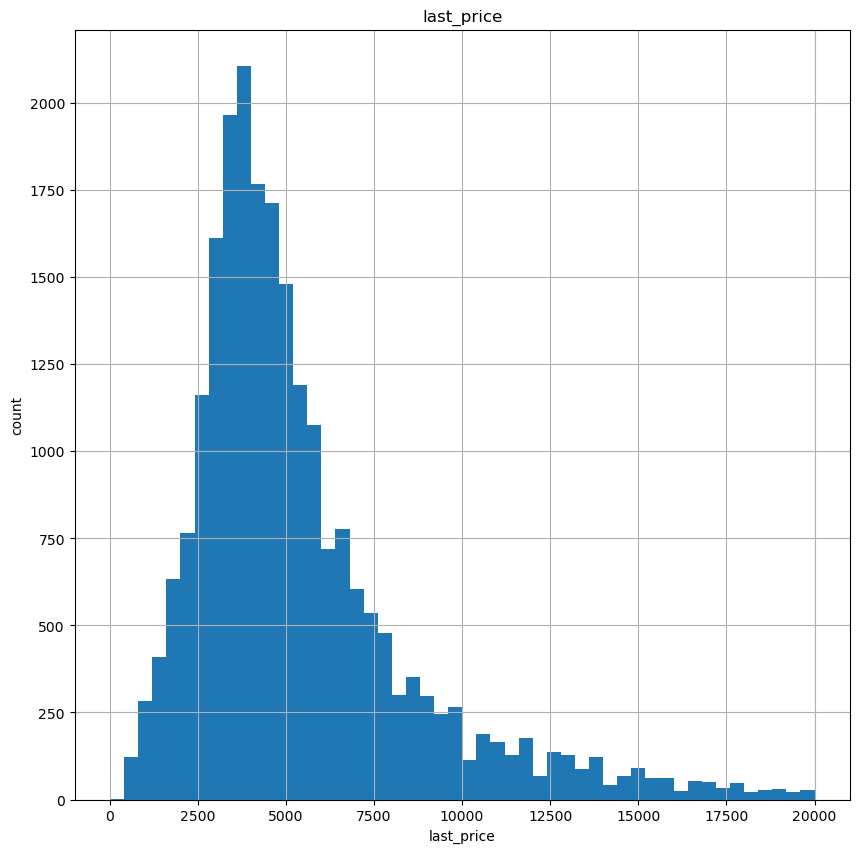

In [44]:
data.query('last_price< 20000')['last_price'].hist(bins = 50, figsize = (10,10))
plt.title('last_price')
plt.ylabel('count')
plt.xlabel('last_price')
plt.show()

**Видно, что квартиры в основном стоят от 2000 т.р. до 7500 т.р.. Так же имеются квартиры с большой стоимостью более 100000 т.р.**

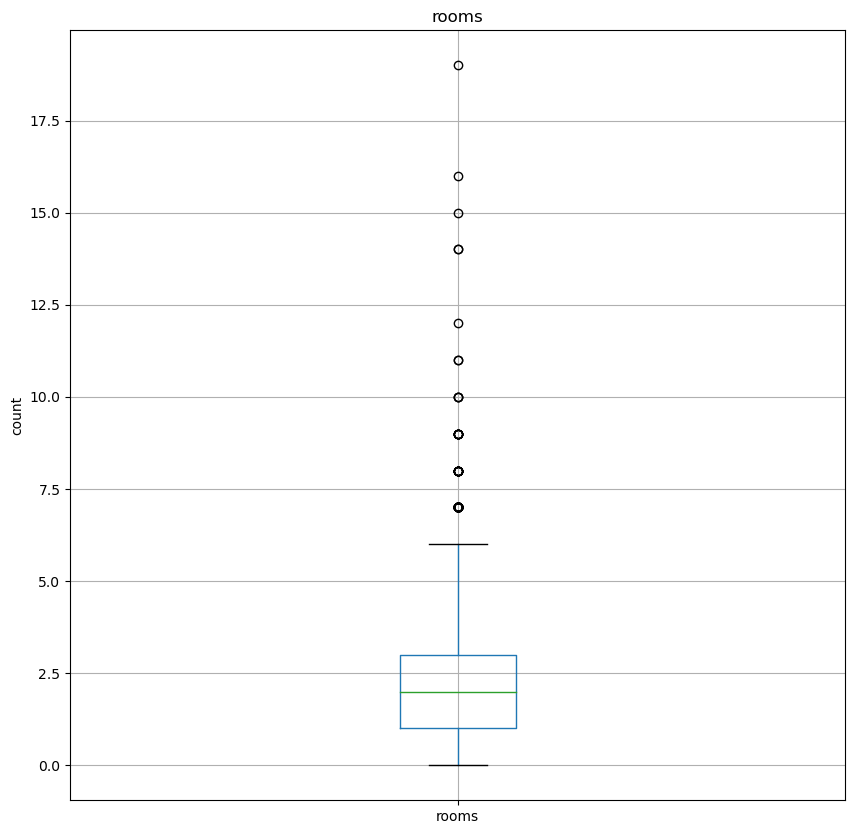

In [45]:
data.boxplot(column = 'rooms', figsize = (10,10))
plt.title('rooms')
plt.ylabel('count')
plt.show()

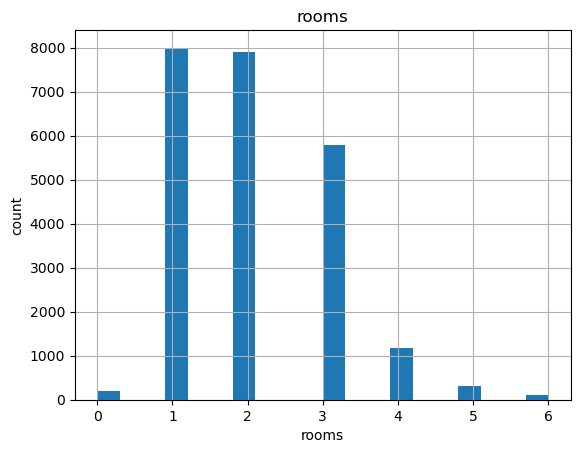

In [46]:
data.query('rooms < 7')['rooms'].hist(bins = 20)
plt.title('rooms')
plt.ylabel('count')
plt.xlabel('rooms')
plt.show()

**График показывает налечие квартир без комнат, скорее всего это студии. Но в среднем комнат в кравртире от 1 до 3**

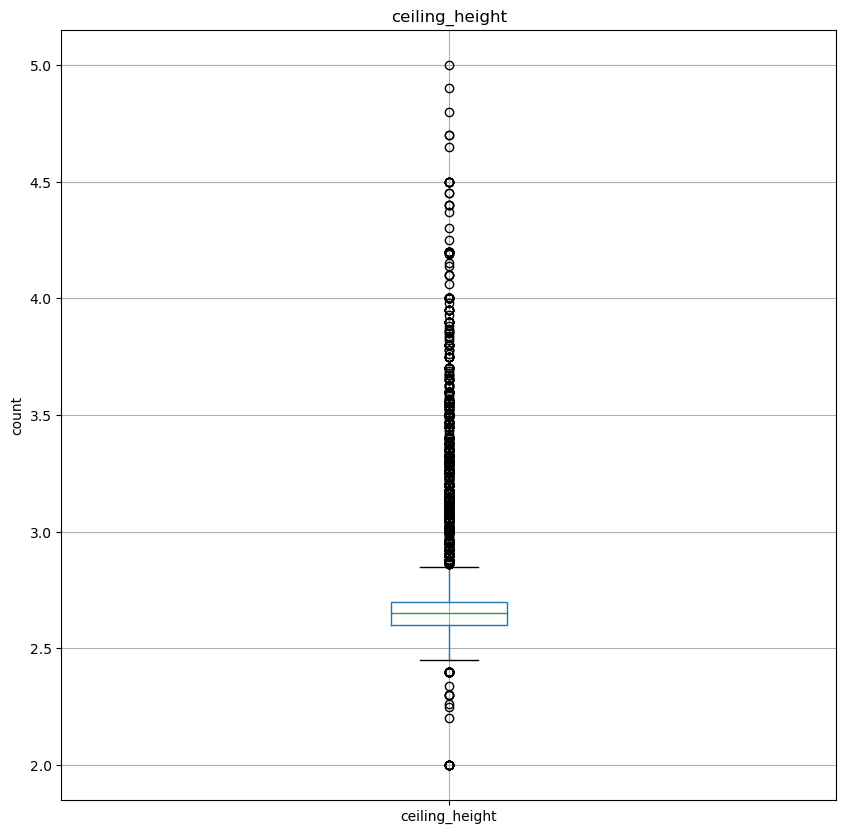

In [47]:
data.boxplot(column = 'ceiling_height', figsize = (10,10
                                                  ))
plt.title('ceiling_height')
plt.ylabel('count')
plt.show()

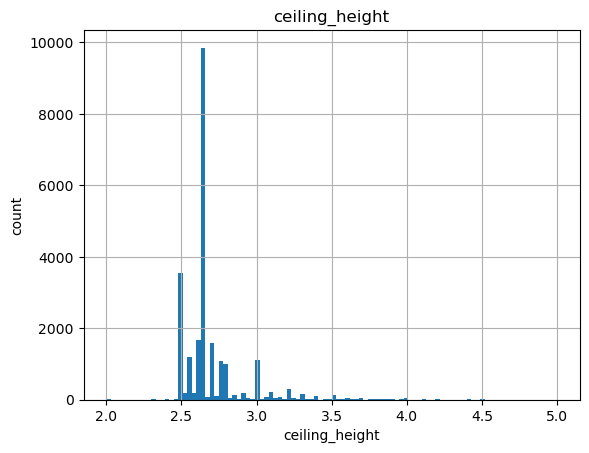

In [48]:
data['ceiling_height'].hist(bins = 100 )
plt.title('ceiling_height')
plt.ylabel('count')
plt.xlabel('ceiling_height')
plt.show()

In [49]:
data['ceiling_height'].describe()

count    23548.000000
mean         2.696055
std          0.215996
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

**Высота потолков состваляет в среднем 2.69 m**

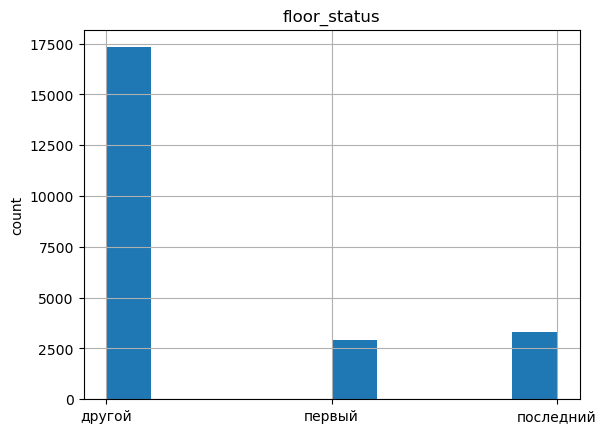

In [50]:
data['floor_status'].hist()
plt.title('floor_status')
plt.ylabel('count')
plt.show()

**На графике заметно, что большинство квартир находятся между первым и послденим этажами**

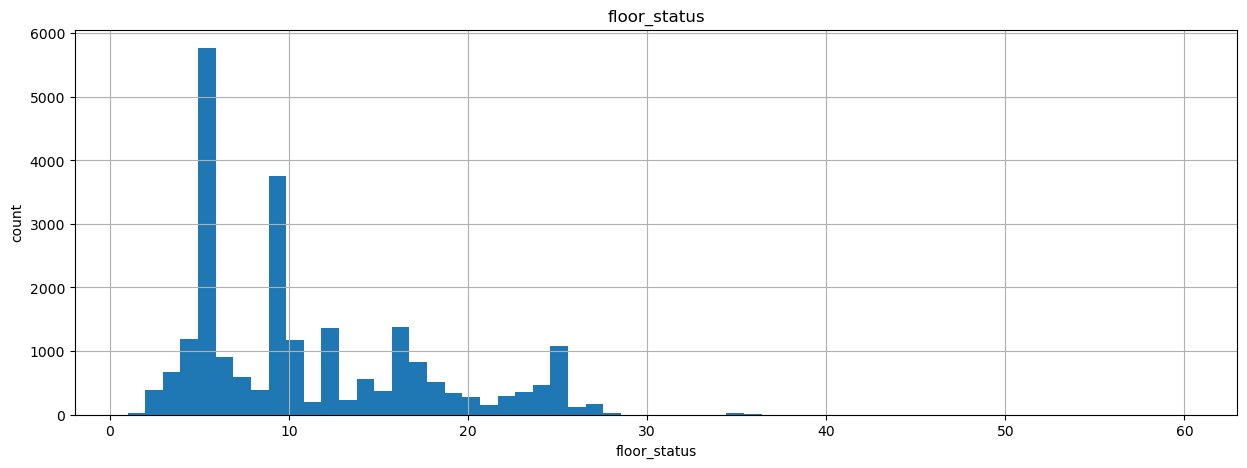

In [51]:
data['floors_total'].hist(bins = 60
                          , figsize = (15,5))
plt.title('floor_status')
plt.ylabel('count')
plt.xlabel('floor_status')
plt.show()

**В основном кваритиры продают на 5 и 9 этажах**

In [52]:
data['cityCenters_nearest'].describe()

count    18049.000000
mean     14195.921270
std       8614.038343
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

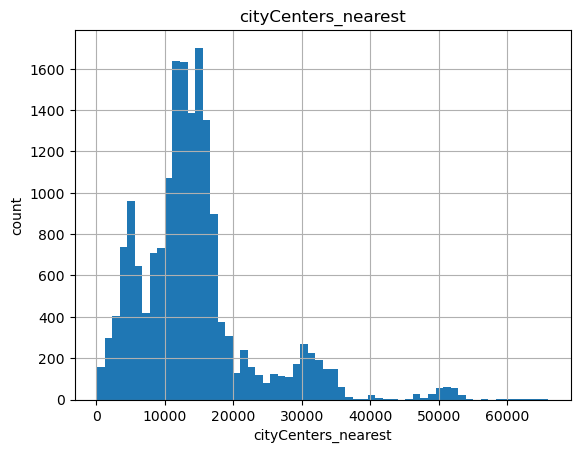

In [53]:
data['cityCenters_nearest'].hist(bins = 60)
plt.title('cityCenters_nearest')
plt.ylabel('count')
plt.xlabel('cityCenters_nearest')
plt.show()

**Много данных до ценра города нет, но из имеющихся, видно преобладание на растояни от 5000 м до 18000 м**

In [54]:
data['parks_nearest'].describe()

count    8020.000000
mean      490.721072
std       341.710178
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

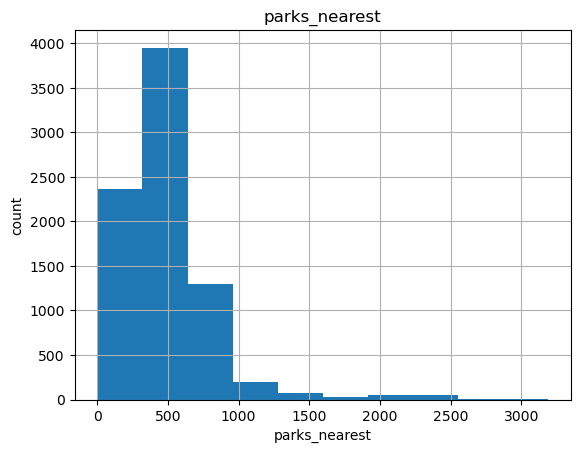

In [55]:
data['parks_nearest'].hist()
plt.title('parks_nearest')
plt.ylabel('count')
plt.xlabel('parks_nearest')
plt.show()

**Около 60% пропущенных данных. Из имеющихся значений можно сделать вывод, что прадажа квартир осуществляется недалеко от парков**

#### Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление

In [56]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,20379.000000
mean,180.703764
std,219.724641
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


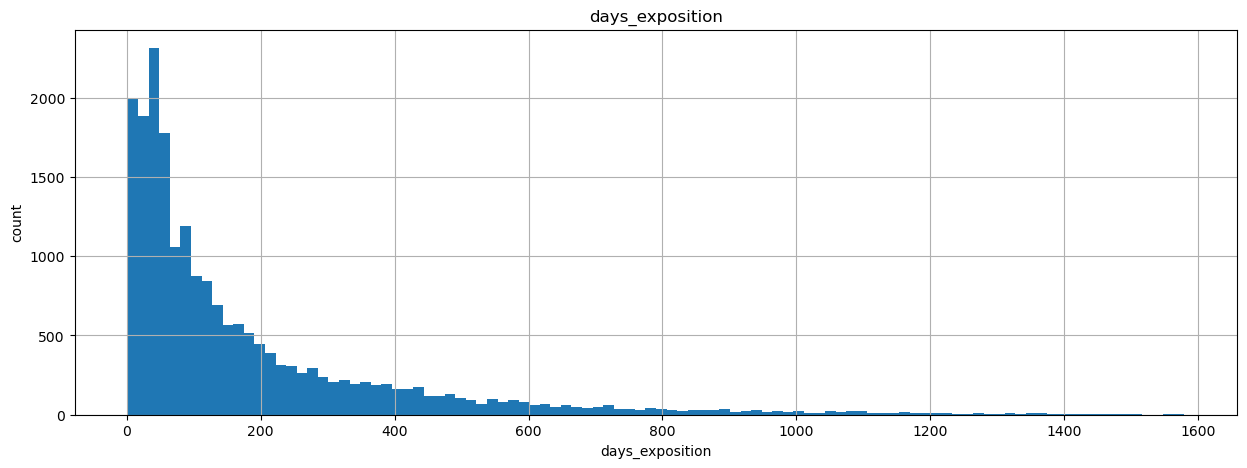

In [57]:
data['days_exposition'].hist(bins = 100 , figsize = (15,5))
plt.title('days_exposition')
plt.ylabel('count')
plt.xlabel('days_exposition')
plt.show()

In [58]:
data['days_exposition'].median()

95.0

In [59]:
data['days_exposition'].mean()

180.7037636782963

**В среднем квартира продается в течении 180 дней. Слишком быстрые продажи приходятся на период до 100 дней, продажи дольше 510 дней можно считать очень долгими, т.к. они находятся за выбркой : p75+(p75-p25)/2 = 231+(231-45)*1.5 = 510**

(-50.0, 600.0)

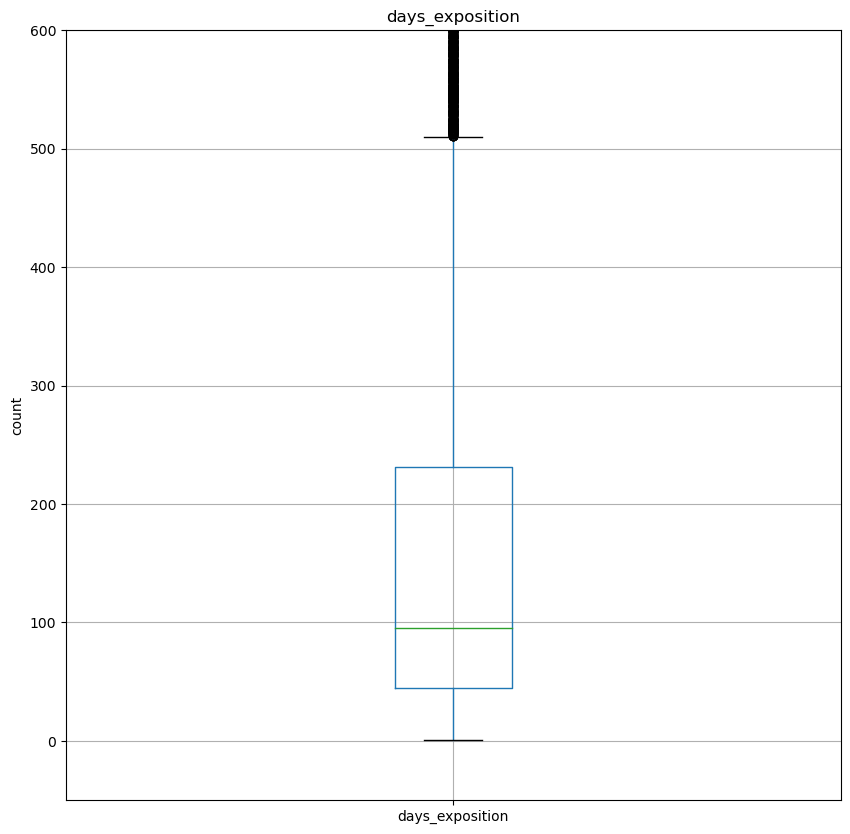

In [60]:
data.boxplot(column='days_exposition', figsize = (10,10))
plt.title('days_exposition')
plt.ylabel('count')
plt.ylim(-50, 600)

Минимальный срок продажи 1 день, а максимальный-1580.

Допускаю, что объявления выше верхнего уса(дольше 520 дней-это просто не снятые объявления.

На мой взгляд быстрыми продажами можно считать обявления, висевшие на сайте менее 45 дней,
а долгими-объявления выше верхнего уса (обявления более 520 дней).

Чтобы понять среднее время продажи не правильно будет считать ср арифметическое, так как есть аномальные значения.
Среднее время продажи примероно 95 дней(2ой квартиль).

#### Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [61]:
corr1 = data[['last_price','total_area','living_area','kitchen_area','rooms']]

In [62]:
corr1.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.651974,0.561798,0.517244,0.362383
total_area,0.651974,1.000000,0.938660,0.611035,0.759270
living_area,0.561798,0.938660,1.000000,0.437919,0.851737
kitchen_area,0.517244,0.611035,0.437919,1.000000,0.285793
rooms,0.362383,0.759270,0.851737,0.285793,1.000000


**Больше всего на стоимость квартиры влияет общая площадь помещения**

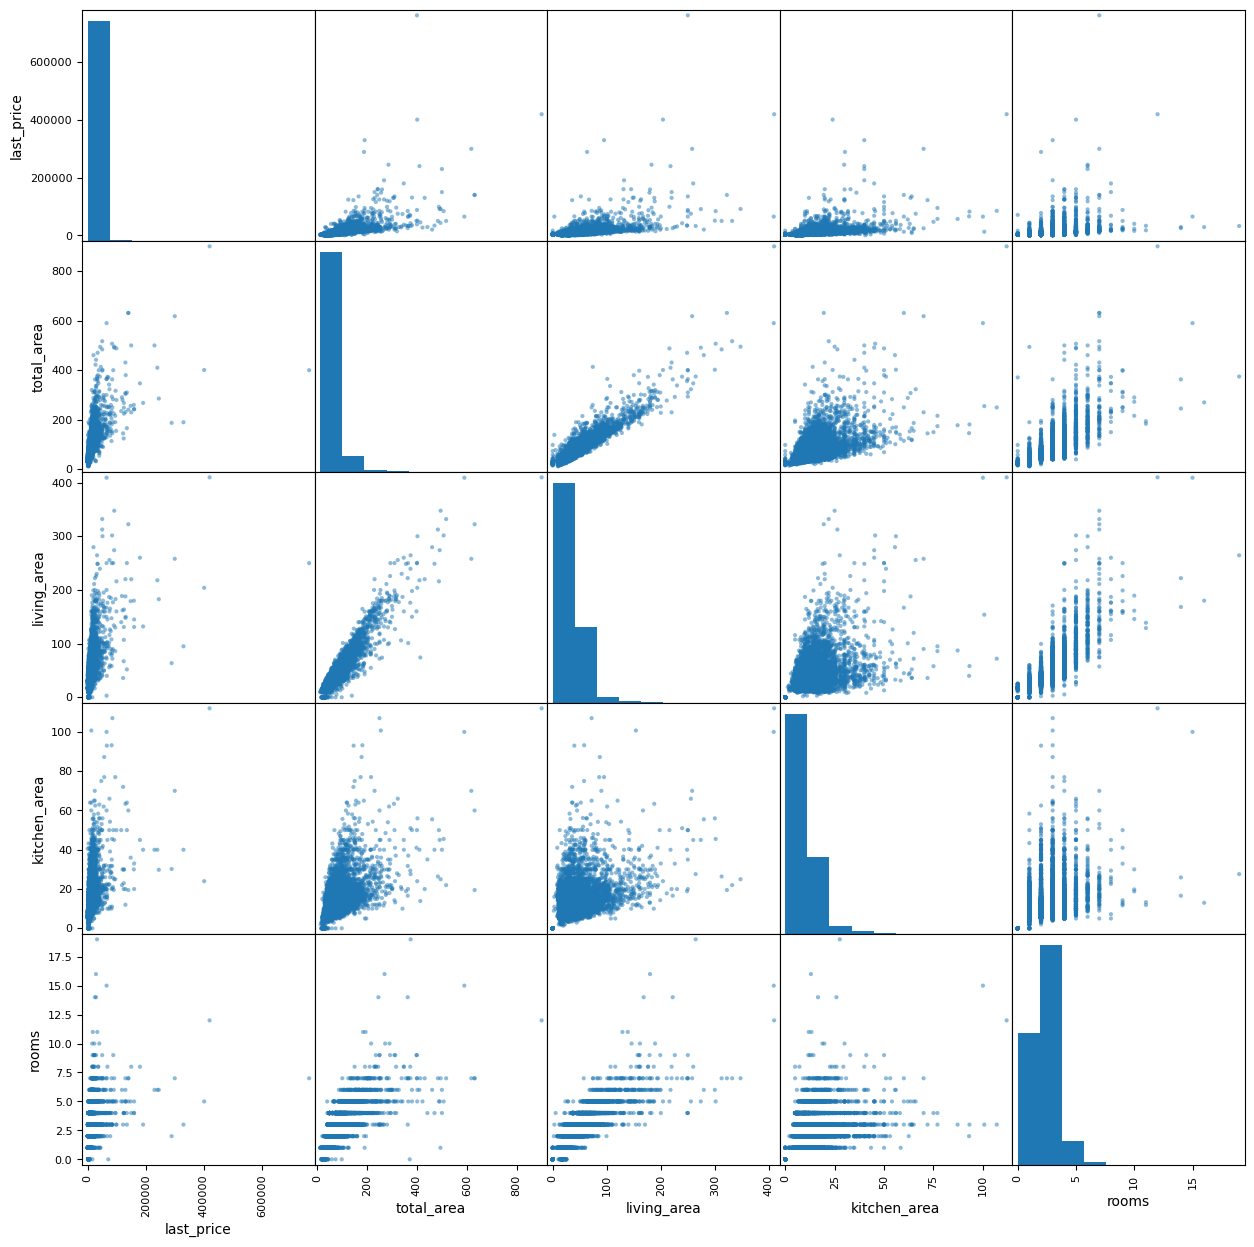

In [63]:
pd.plotting.scatter_matrix(corr1, figsize=(15,15)) 
plt.show()

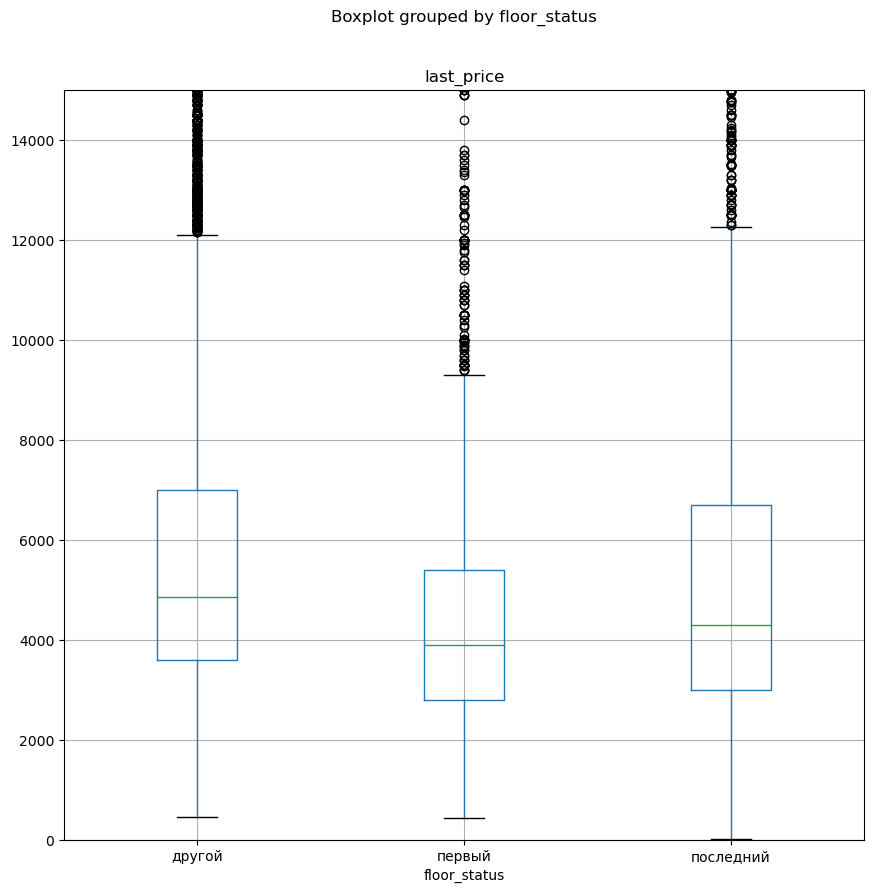

In [64]:
plot = data.boxplot('last_price', by='floor_status',figsize=(10,10)).set_ylim(0,15000)

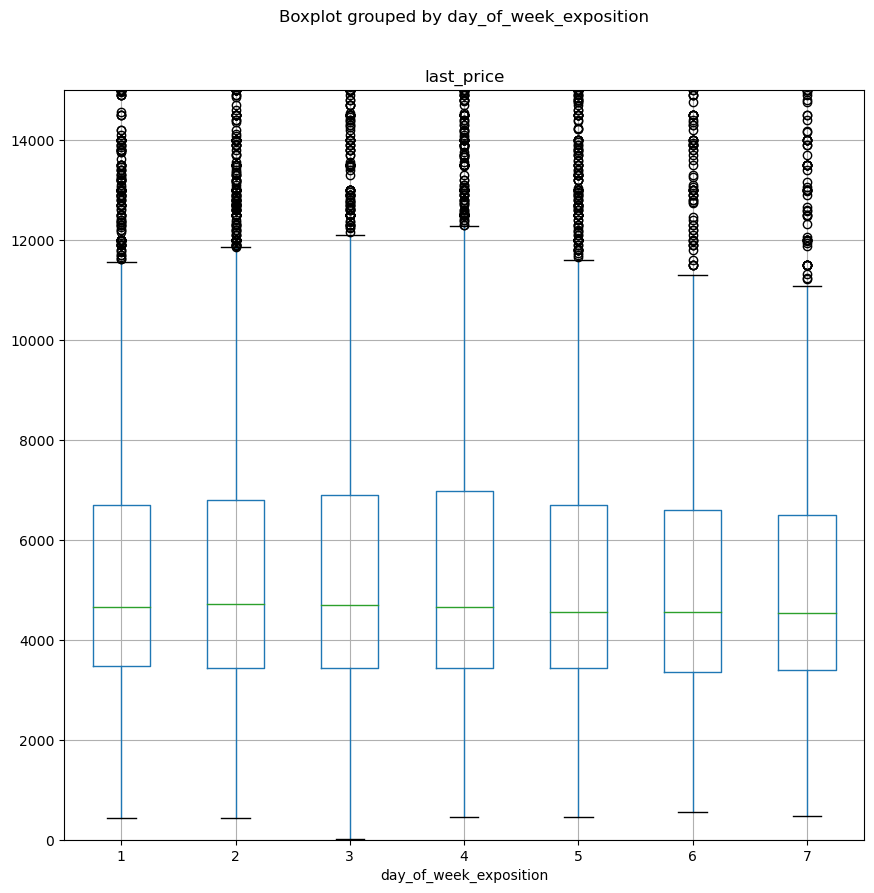

In [65]:
plot = data.boxplot('last_price', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,15000)

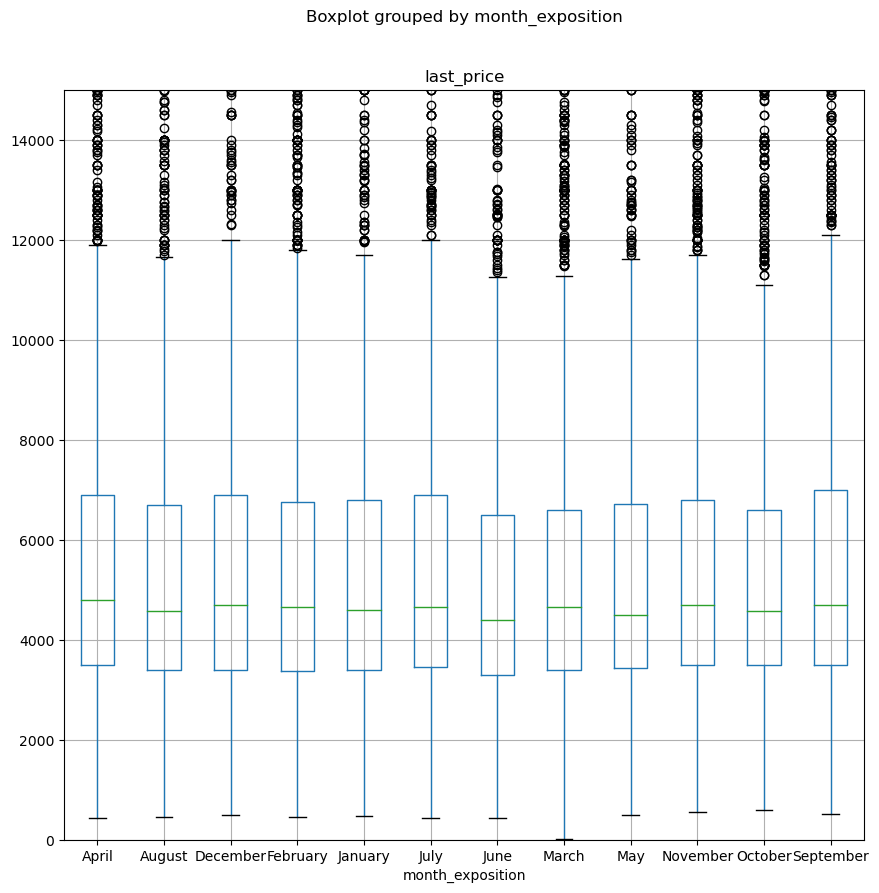

In [66]:
plot = data.boxplot('last_price', by='month_exposition',figsize=(10,10)).set_ylim(0,15000)

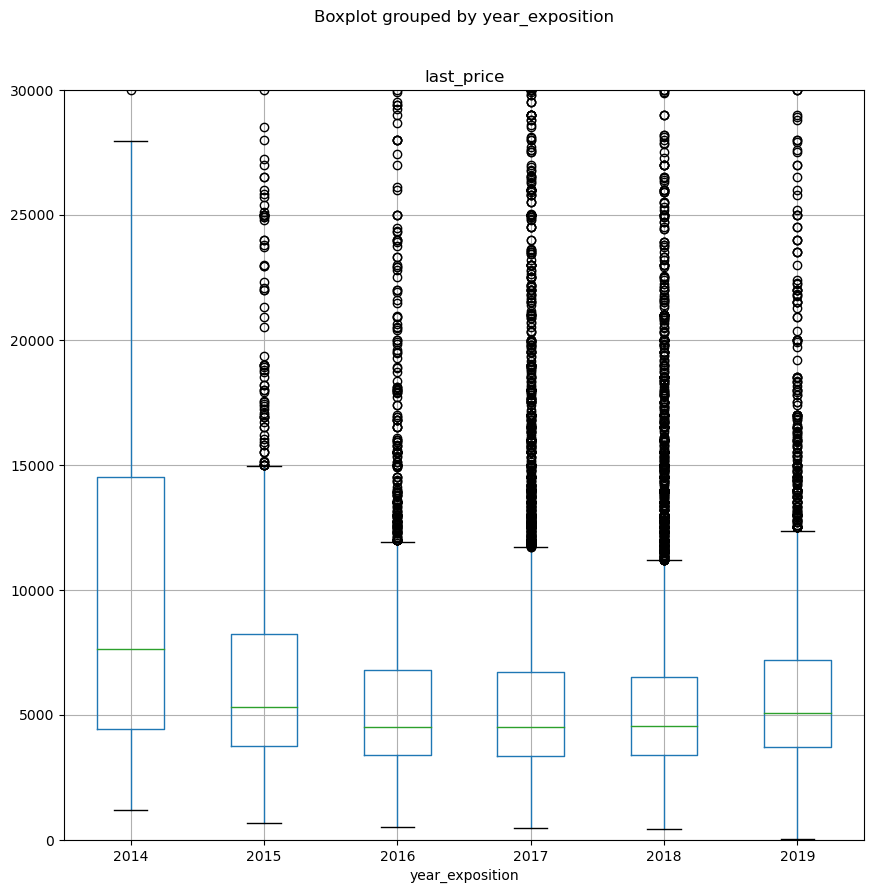

In [67]:
plot = data.boxplot('last_price', by='year_exposition',figsize=(10,10)).set_ylim(0,30000)

**Зависимость цены от дня недели публикации практически никак не зависит
Зависимость цены от месяца публикации практически никак не зависит
Зависимость цены от года публикации - 2014г. тут очень выделяется, цены на квартиры была очень высокой**

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [68]:
top_10_data = data.groupby('locality_name').agg({'locality_name':'count','price_per_meter':'mean'})
top_10_data = top_10_data.rename(columns={'locality_name': 'locality_name_count'})
top_1 = top_10_data.sort_values(by = 'locality_name_count' , ascending = False ).head(10)
top_1.sort_values(by = 'price_per_meter' , ascending = False )

,locality_name_count,price_per_meter
locality_name,,
санкт-петербург,15637,64.690842
пушкин,369,61.552791
выборг,237,56.150042
всеволожск,398,56.022186
поселок шушары,439,53.886925
колпино,338,53.231479
поселок парголово,327,51.521407
гатчина,307,50.942932
деревня кудрово,299,46.571739


**По сводной таблице все наглядно показанно, дороже всего цена за квадратный метр в СпБ**

#### Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить их среднюю стоимость на разном удалении от центра. Учитывать каждый километр расстояния: узнать среднюю цену квартир в одном километре от центра, в двух и так далее. Описать, как стоимость объектов зависит от расстояния до центра города — построить график изменения средней цены для каждого километра от центра Петербурга.

In [69]:
spb = data.loc[data['locality_name'] == "санкт-петербург"].reset_index(drop = True)
spb_groupby = spb.groupby('city_center_distance_km').agg({'city_center_distance_km':'count','last_price':'mean'})
spb_groupby = spb_groupby.rename(columns={'city_center_distance_km':'distance_km', 'city_center_distance_km':
                                          'distance_count', 'last_price': 'last_price_mean'}).reset_index()
spb_groupby

,city_center_distance_km,distance_count,last_price_mean
0,0.0,27,31449.115852
1,1.0,191,21274.818843
2,2.0,310,17788.319613
3,3.0,348,11137.394687
4,4.0,687,13317.968437
5,5.0,914,14302.227563
6,6.0,616,15133.348317
7,7.0,418,14543.524129
8,8.0,593,9940.593862
9,9.0,591,6956.582973


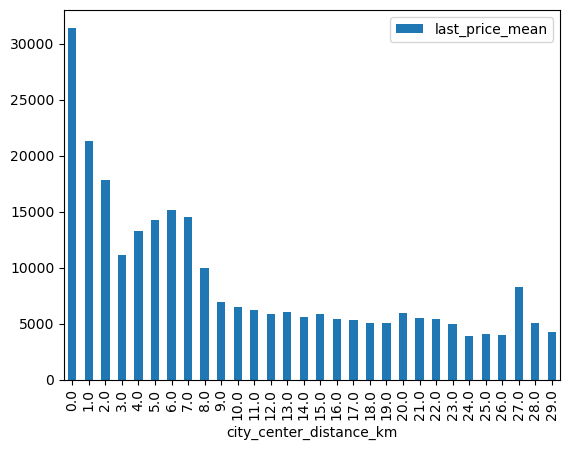

In [70]:
spb_groupby.plot(x = 'city_center_distance_km' , y = 'last_price_mean', kind = 'bar')
plt.show()

**Ожидаемо, что в самом центре (в радиусе до 1 км) средняя цена на квартиру стремится к 30 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее средняя цена довольно заметно падает.**

### Напишите общий вывод

**Квартиры в центре и в Питере обычно дороже, чем квартиры вне центра и за Питером.
Больше всего на стоимость квартиры влияет общая площадь помещения.
Чаще всего квартиры продаются в течении полу года.
Время размещения объявления никак не влияет на стоимость и продажу квартиры.
Так же можно заметить, наиболее желанные квартиры находятся на 5 и 9 ом этаже, их больше всего продают и скупают**

***Нашей задачей было научиться определять рыночную стоимость объектов недвижимости, и можно выделить следующие моменты:***

    -Центром города можно счатать квартиры, расположенные в радиусе 8 киллометров, их средняя стоимость самая большая.
    -Самый большой фактор влияющий на стоимость это площадь квартиры: чем больше площадь, тем, соответственно, дороже квартира.
    -Следует обратить внимание на квартиры, срок продажи которых менее месяца, возможно имеет место мошенничество.
    -Большое количество пропущенных значений с информации о расстоянии от центра города: эти данные получены автоматически, следует обратить на это внимание и отладить заполнение данных.
    -Возможно следут ввести некторые ограничения для данных, заполняемых пользователем, что бы не выходило как с высотой полоков, где значения достигали 100м. Это позволит избежать аномалий.